In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('flipkart_final_cleared.csv')
df.head()

,Unnamed: 0,product_name,product_category_tree,retail_price,discounted_price,is_FK_Advantage_product,product_rating,overall_rating,Brand_names,product_category,product_specs_refined
0,0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",999.0,379.0,False,5.0,3.0,Alisha,Clothing,"{""product_specification""=>[{""key""=>""Number of ..."
1,1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32157.0,22646.0,False,2.0,5.0,FabHomeDecor,Furniture,"{""product_specification""=>[{""key""=>""Installati..."
2,2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",999.0,499.0,False,4.0,3.0,AW,Footwear,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",699.0,267.0,False,2.0,4.0,Alisha,Clothing,"{""product_specification""=>[{""key""=>""Number of ..."
4,4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",220.0,210.0,False,1.0,3.0,Sicons,Pet Supplies,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19441 entries, 0 to 19440
Data columns (total 11 columns):
Unnamed: 0                 19441 non-null int64
product_name               19441 non-null object
product_category_tree      19441 non-null object
retail_price               19441 non-null float64
discounted_price           19441 non-null float64
is_FK_Advantage_product    19441 non-null bool
product_rating             19441 non-null float64
overall_rating             19441 non-null float64
Brand_names                19441 non-null object
product_category           19441 non-null object
product_specs_refined      19441 non-null object
dtypes: bool(1), float64(4), int64(1), object(5)
memory usage: 1.5+ MB


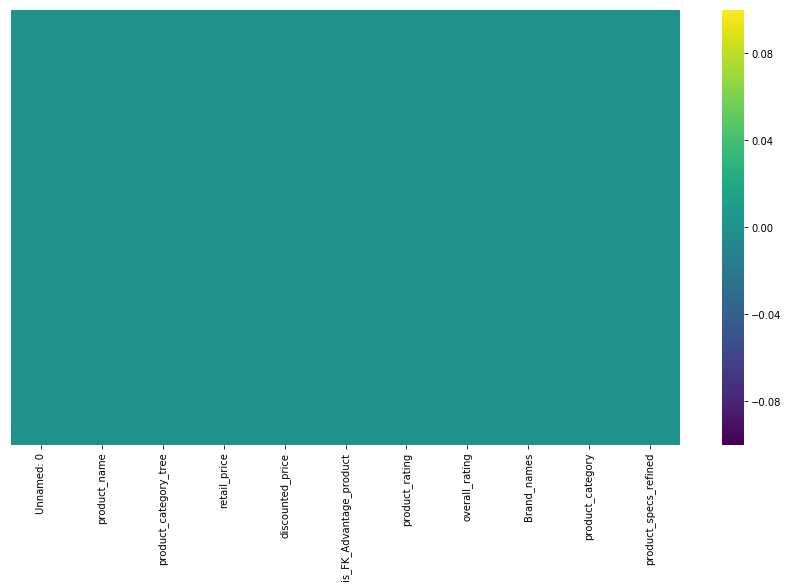

In [4]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [5]:
fk = pd.get_dummies(df["is_FK_Advantage_product"],drop_first = True)
df['is_FK_Advantage_product'] = fk
df.head()

,Unnamed: 0,product_name,product_category_tree,retail_price,discounted_price,is_FK_Advantage_product,product_rating,overall_rating,Brand_names,product_category,product_specs_refined
0,0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",999.0,379.0,0,5.0,3.0,Alisha,Clothing,"{""product_specification""=>[{""key""=>""Number of ..."
1,1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32157.0,22646.0,0,2.0,5.0,FabHomeDecor,Furniture,"{""product_specification""=>[{""key""=>""Installati..."
2,2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",999.0,499.0,0,4.0,3.0,AW,Footwear,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",699.0,267.0,0,2.0,4.0,Alisha,Clothing,"{""product_specification""=>[{""key""=>""Number of ..."
4,4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",220.0,210.0,0,1.0,3.0,Sicons,Pet Supplies,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [6]:
df["discount_percent"] = ((df.retail_price - df.discounted_price)*100)/df.retail_price
df.head()

,Unnamed: 0,product_name,product_category_tree,retail_price,discounted_price,is_FK_Advantage_product,product_rating,overall_rating,Brand_names,product_category,product_specs_refined,discount_percent
0,0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",999.0,379.0,0,5.0,3.0,Alisha,Clothing,"{""product_specification""=>[{""key""=>""Number of ...",62.062062
1,1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32157.0,22646.0,0,2.0,5.0,FabHomeDecor,Furniture,"{""product_specification""=>[{""key""=>""Installati...",29.576764
2,2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",999.0,499.0,0,4.0,3.0,AW,Footwear,"{""product_specification""=>[{""key""=>""Ideal For""...",50.050050
3,3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",699.0,267.0,0,2.0,4.0,Alisha,Clothing,"{""product_specification""=>[{""key""=>""Number of ...",61.802575
4,4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",220.0,210.0,0,1.0,3.0,Sicons,Pet Supplies,"{""product_specification""=>[{""key""=>""Pet Type"",...",4.545455


In [7]:
df[['product_name','Brand_names','retail_price','discounted_price','discount_percent']].head()

,product_name,Brand_names,retail_price,discounted_price,discount_percent
0,Alisha Solid Women's Cycling Shorts,Alisha,999.0,379.0,62.062062
1,FabHomeDecor Fabric Double Sofa Bed,FabHomeDecor,32157.0,22646.0,29.576764
2,AW Bellies,AW,999.0,499.0,50.050050
3,Alisha Solid Women's Cycling Shorts,Alisha,699.0,267.0,61.802575
4,Sicons All Purpose Arnica Dog Shampoo,Sicons,220.0,210.0,4.545455


In [8]:
number = LabelEncoder()

df['Brand_names'] = number.fit_transform(df['Brand_names'])

df['product_category'] = number.fit_transform(df['product_category'])

df['discount_percent'] = number.fit_transform(df['discount_percent'])


In [9]:
features = df[["Brand_names", "product_category"]]
target = df["discount_percent"]

In [10]:
features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.33,random_state = 101)


In [11]:
model = GaussianNB()
model.fit(features_train, target_train)

GaussianNB(priors=None)

In [12]:
G_pred = model.predict(features_test)
accuracy = accuracy_score(target_test, G_pred)
print("Accuracy = ",accuracy)

Accuracy =  0.12889650872817954


In [13]:
knn=KNeighborsClassifier(n_neighbors=2)

In [14]:
knn.fit(features_train, target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [15]:
knn_pred = knn.predict(features_test)

In [16]:
print(confusion_matrix(target_test, knn_pred))

[[461   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [17]:
print(classification_report(target_test, knn_pred))

             precision    recall  f1-score   support

          0       0.46      0.64      0.54       721
          1       0.00      0.00      0.00         1
          2       0.00      0.00      0.00         1
          3       0.00      0.00      0.00         0
          7       0.00      0.00      0.00         1
          9       0.00      0.00      0.00         1
         10       0.00      0.00      0.00         1
         15       0.00      0.00      0.00         1
         16       0.00      0.00      0.00         1
         18       0.00      0.00      0.00         1
         19       0.00      0.00      0.00         0
         20       0.00      0.00      0.00         2
         23       0.00      0.00      0.00         1
         24       0.00      0.00      0.00         0
         26       0.00      0.00      0.00         1
         29       0.00      0.00      0.00         1
         30       0.00      0.00      0.00         1
         37       0.00      0.00      0.00   

C:\Users\koner\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\koner\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [18]:
accuracy_knn = accuracy_score(target_test, knn_pred)
print("Accuracy = ",accuracy_knn)

Accuracy =  0.2378428927680798


# Perceptron

In [19]:
sc = StandardScaler()
sc.fit(features_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
features_train_std = sc.transform(features_train)
features_test_std = sc.transform(features_test)

In [21]:
ppn = Perceptron(n_iter = 40,eta0 = 0.1, random_state=101)

In [22]:
#ppn.fit(features_train, target_train)

In [23]:
#P_pred = ppn.predict(features_test_std)

In [24]:
#P_pred

In [25]:
#print('Accuracy: %2f' %accuracy_score(target_test,P_pred))

In [26]:
#regr = linear_model.LinearRegression()

In [27]:
regr = linear_model.LinearRegression()

In [28]:
regr.fit(features_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
L_pred = regr.predict(features_test)

In [30]:
coeff_df=pd.DataFrame(regr.coef_,features.columns,columns=['Coefficient'])
coeff_df#the increase of a parameter

,Coefficient
Brand_names,-0.009506
product_category,-5.098975


In [31]:
print(regr.intercept_)

3317.754473625088


In [32]:
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
print("Mean squared error: %.2f"% mean_squared_error(target_test, L_pred))

Mean squared error: 3222767.00


In [34]:
print('Variance score: %.2f' % r2_score(target_test, L_pred))

Variance score: 0.02


Text(0.5,1,'Discount_percent vs Predicted Discount_percent: $Y_i$ vs $\\hat{Y}_i$')

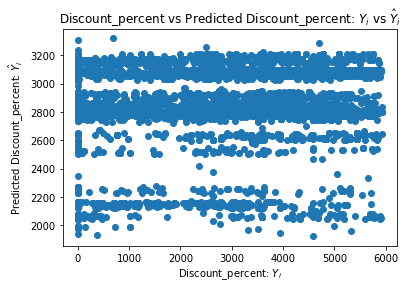

In [35]:
plt.scatter(target_test, L_pred)
plt.xlabel("Discount_percent: $Y_i$")
plt.ylabel("Predicted Discount_percent: $\hat{Y}_i$")
plt.title("Discount_percent vs Predicted Discount_percent: $Y_i$ vs $\hat{Y}_i$")

# LDA

In [36]:
features = df[["Brand_names", "product_category"]]
target = df["discount_percent"]

In [37]:
features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.33,random_state = 101)


In [38]:
sc = StandardScaler()
features_train = sc.fit_transform(features_train)
features_test = sc.transform(features_test)

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 2)
features_train = lda.fit_transform(features_train, target_train)
features_test = lda.transform(features_test)

In [40]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(features_train, target_train)
 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
# Predicting the Test set results
lda_pred = classifier.predict(features_test)

In [44]:
from matplotlib.colors import ListedColormap
X_set, y_set = features_test, target_test

aranged_pc1 = np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.01)
aranged_pc2 = np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.01)



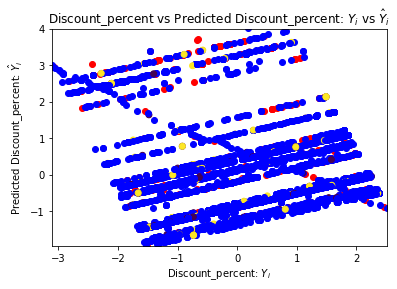

In [51]:
X1, X2 = np.meshgrid(aranged_pc1, aranged_pc2)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('Discount_percent vs Predicted Discount_percent: $Y_i$ vs $\hat{Y}_i$')
plt.xlabel('Discount_percent: $Y_i$')
plt.ylabel('Predicted Discount_percent: $\hat{Y}_i$')
plt.show()


In [49]:
lda_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)